In [1]:
import numpy as np
import matplotlib.pyplot as plt

# generate the parameter files

In [9]:
def analytic(b):
    xi = np.sqrt(3)/(0.525)/np.pi**(5./12.)
    fesc = 1./(np.cosh(xi*np.sqrt(b)))
    return fesc

In [14]:
from astropy import units as u
template = "template"
import sys
sys.path.append("/astro/home/christoph.behrens/LLTC/python")
from params_file import params_file
template_file = params_file(template)
bs = np.logspace(-2,1.8,12)
#print bs
for i,b in enumerate(bs):
    myfilename = "inputs_"+repr(i)
    template_file = params_file(template)
    T = 2e6
    taud = 0.01
    local_v_thermal=12.85*1.*np.sqrt(T/10000.0)*1e5
    a=4.7e-4*(12.85/(local_v_thermal/1.e5))
    tau0 = (b/taud)**3/a
    while(tau0*a<1e4):
        if(T>20.0):
            T/=2.
            local_v_thermal=12.85*1.*np.sqrt(T/10000.0)*1e5
            a=4.7e-4*(12.85/(local_v_thermal/1.e5))
        else:
            taud/=2.
        tau0 = (b/taud)**3/a
        #print "trying",T,taud,tau0,a*tau0
    #print "found",np.log10(tau0),tau0*a
    while(tau0>1e5 and tau0*a>=1e4):
        #print "trying (2)"
        if(T>20.):
            T /= 2.
            local_v_thermal=12.85*1.*np.sqrt(T/10000.0)*1e5
            a=4.7e-4*(12.85/(local_v_thermal/1.e5))
        else:
            taud*=2.
        tau0 = (b/taud)**3/a
    #print "found(2)",np.log10(tau0),np.log10(tau0*a),T,taud
    #tau0 = 1./np.sqrt(T/2e4)*8.3e6*NH/2e20
    print "parameter set b =", b, "tau0 =",tau0,"taud =",taud,"T =",T,"log atau0 =",np.log10(tau0*a)
    #calculate the column density of hydrogen
    NH = (tau0*2e20/8.3e6*np.sqrt(T/2e4))*u.cm**-2
    slablength =  0.5*u.kpc
    rho = (NH/slablength).to(u.cm**-3)
    #calculate the dust density
    crosssection = 1.009882e+05*u.cm**2/u.g
    rho_dust = (taud/crosssection/slablength).to(u.g/u.cm**3)
    template_file["slab.temperature"] = T
    template_file["slab.density_dust"] = rho_dust.value
    template_file["slab.density"] = rho.value
    fesc = analytic(b)
    factor = 0.01/fesc
    factor = max(factor,1.0)
    factor = min(1e2,factor)
    print factor
    template_file["number_of_photons"] = int(template_file["number_of_photons"]*factor)
    
    
        
    comment = "tau0 "+repr(tau0)+" taud "+repr(taud)+" a*tau0 "+repr(a*tau0)
    template_file.write(myfilename,comment=comment)
    

parameter set b = 0.01 tau0 = 340425.531915 taud = 0.000625 T = 15.2587890625 log atau0 = 3.61235994797
1.0
parameter set b = 0.0221541221258 tau0 = 462696.030945 taud = 0.00125 T = 15.2587890625 log atau0 = 3.74563359734
1.0
parameter set b = 0.0490805127165 tau0 = 628882.37509 taud = 0.0025 T = 15.2587890625 log atau0 = 3.87890724671
1.0
parameter set b = 0.108733567272 tau0 = 106844.725059 taud = 0.01 T = 15.2587890625 log atau0 = 3.10909090909
1.0
parameter set b = 0.240889672852 tau0 = 145220.101249 taud = 0.02 T = 15.2587890625 log atau0 = 3.24236455846
1.0
parameter set b = 0.533669923121 tau0 = 197378.745605 taud = 0.04 T = 15.2587890625 log atau0 = 3.37563820783
1.0
parameter set b = 1.18229886517 tau0 = 268271.188916 taud = 0.08 T = 15.2587890625 log atau0 = 3.50891185721
1.0
parameter set b = 2.61927934482 tau0 = 364626.042089 taud = 0.16 T = 15.2587890625 log atau0 = 3.64218550658
1.0
parameter set b = 5.80278344867 tau0 = 495588.628457 taud = 0.32 T = 15.2587890625 log ata

# plot the results

12 12


/astro/home/christoph.behrens/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide


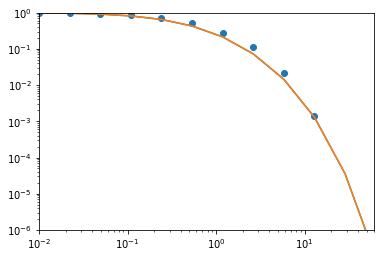

In [15]:
y = analytic(bs)
plt.plot(bs,y,label="analytic")
nphot = np.zeros(12)
for i in range(0,10):
    p=params_file("inputs_"+repr(i))
    nphot[i] = p["number_of_photons"]
data=np.loadtxt("escape_fractions.txt",dtype=str)
escaped_photons = data[:,0].astype(int)
print bs.size, escaped_photons.size
plt.scatter(bs,escaped_photons/nphot,label="MC")
#print escaped_photons
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,60)
plt.ylim(1e-6,1)
plt.show()
